In [215]:
from NeuralNet import NeuralNet
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D
# plt.style.use('ggplot')
plt.style.use('seaborn-dark-palette')
# %matplotlib inline
# matplotlib.use('nbagg')
# %matplotlib notebook
# %matplotlib qt 

In [2]:
wdir = "/home/cosmocicatais/simpleMC/chains_bambi/"
chain_lcdm_hd = "LCDM_phy_HD_nested_dynesty_multi_1.txt"

In [3]:
data = np.loadtxt(wdir+chain_lcdm_hd)

In [4]:
samples = data[:,2:5]
likes = data[:,1]
len(likes)

139654

Text(0.5, 1.0, '$2\\;logL$')

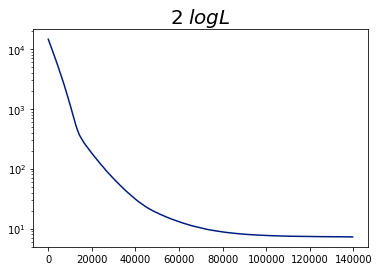

In [5]:
plt.plot(likes)
plt.yscale('log')
plt.title('$2\;logL$', fontsize=20)

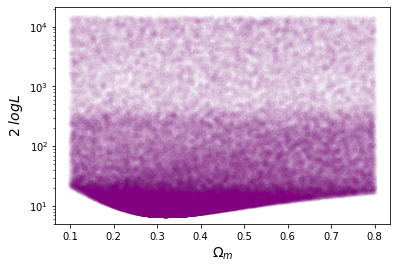

In [6]:
plt.scatter(samples[:,0],likes, linewidth=1e-5, alpha=0.02, c='purple')
plt.xlabel('$\Omega_m$', fontsize=14)
plt.ylabel(r'$2\;logL$', fontsize=14)
plt.yscale('log')

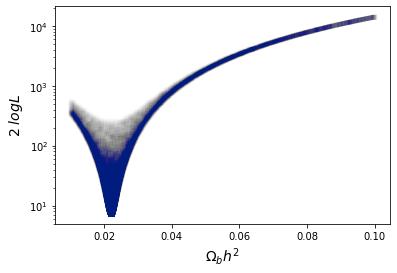

In [7]:
plt.scatter(samples[:,1],likes, linewidth=1e-7, alpha=0.005)
plt.xlabel('$\Omega_bh^2$', fontsize=14)
plt.ylabel(r'$2\;logL$', fontsize=14)
plt.yscale('log')

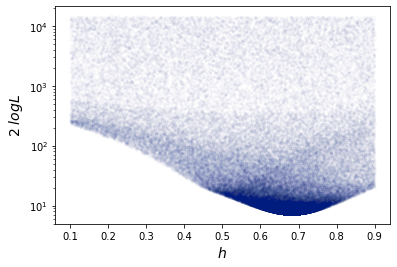

In [8]:
plt.scatter(samples[:,2],likes,marker='.', linewidth=1e-5, alpha=0.02)
plt.xlabel('$h$', fontsize=14)
plt.ylabel(r'$2\;logL$', fontsize=14)
plt.yscale('log')

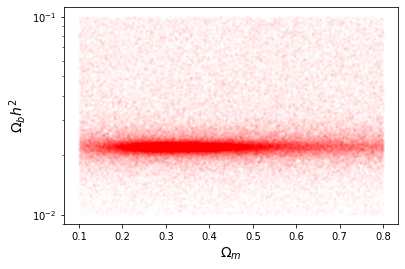

In [262]:
plt.scatter(samples[:,0],samples[:,1], marker='.', linewidth=1e-5, alpha=0.02, c='r')
plt.xlabel('$\Omega_m$', fontsize=14)
plt.ylabel(r'$\Omega_bh^2$', fontsize=14)
plt.yscale('log')
# plt.xscale('log')

Text(0, 0.5, '$h$')

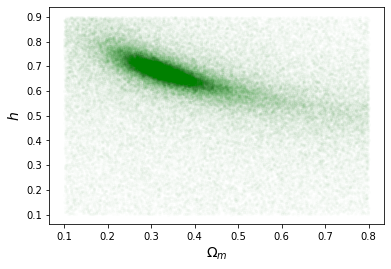

In [10]:
plt.scatter(samples[:,0],samples[:,2], marker='.', linewidth=1e-5, alpha=0.01, c='g')
plt.xlabel('$\Omega_m$', fontsize=14)
plt.ylabel(r'$h$', fontsize=14)

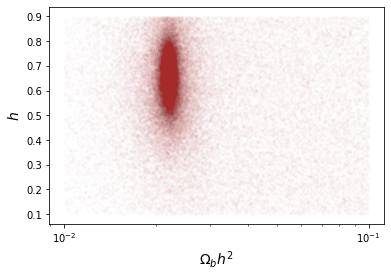

In [11]:
plt.scatter(samples[:,1],samples[:,2], marker='.', linewidth=1e-5, alpha=0.01, c='brown')
plt.xlabel('$\Omega_b h^2$', fontsize=14)
plt.ylabel(r'$h$', fontsize=14)
plt.xscale('log')

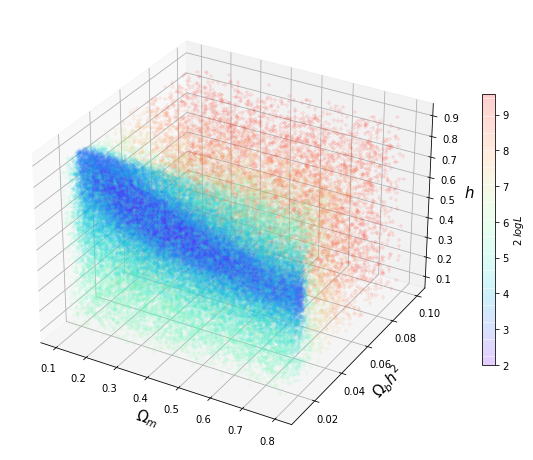

In [102]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(samples[:,0],samples[:,1], samples[:,2], marker='+', c=np.log(likes), cmap='rainbow', alpha=0.1)
ax.set_xlabel('$\Omega_m$', fontsize=15)
ax.set_ylabel('$\Omega_bh^2$', fontsize=15)
ax.set_zlabel('$h$', fontsize=15)
plt.colorbar(p,shrink=0.5, label='$2\;logL$')

In [13]:
# network = NeuralNet(samples, likes, [3, 100,100,1], epochs=200, batch_size=32,\
#                     learrning_rate=1e-5)
# funciona bien para 50mil muestras

In [14]:
network = NeuralNet(samples, likes, [3, 100,100, 200, 1], epochs=200, batch_size=64,\
                    learrning_rate=1e-5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 30,901
Trainable params: 30,901
Non-trainable params: 0
_________________________________________________________________


In [15]:
network.train()

Training...
Epoch 1/200
1746/1746 [==============================] - 2s 833us/step - loss: 3149553.1530 - val_loss: 3061921.7500
Epoch 2/200
1746/1746 [==============================] - 1s 725us/step - loss: 2951833.4978 - val_loss: 2992843.5000
Epoch 3/200
1746/1746 [==============================] - 1s 699us/step - loss: 2938016.7981 - val_loss: 2839597.7500
Epoch 4/200
1746/1746 [==============================] - 1s 706us/step - loss: 2684802.7428 - val_loss: 2633468.0000
Epoch 5/200
1746/1746 [==============================] - 1s 737us/step - loss: 2556903.9296 - val_loss: 2351201.0000
Epoch 6/200
1746/1746 [==============================] - 1s 717us/step - loss: 2184372.0626 - val_loss: 1797249.5000
Epoch 7/200
1746/1746 [==============================] - 1s 723us/step - loss: 1560264.8552 - val_loss: 947136.5625
Epoch 8/200
1746/1746 [==============================] - 1s 740us/step - loss: 736079.4725 - val_loss: 329684.6875
Epoch 9/200
1746/1746 [==============================] 

1746/1746 [==============================] - 1s 732us/step - loss: 26.0438 - val_loss: 24.4984
Epoch 76/200
1746/1746 [==============================] - 1s 720us/step - loss: 25.4964 - val_loss: 25.4723
Epoch 77/200
1746/1746 [==============================] - 1s 736us/step - loss: 30.2837 - val_loss: 30.6855
Epoch 78/200
1746/1746 [==============================] - 1s 730us/step - loss: 24.5219 - val_loss: 21.1740
Epoch 79/200
1746/1746 [==============================] - 1s 732us/step - loss: 23.7961 - val_loss: 20.3139
Epoch 80/200
1746/1746 [==============================] - 1s 752us/step - loss: 25.5617 - val_loss: 24.7162
Epoch 81/200
1746/1746 [==============================] - 1s 730us/step - loss: 29.8668 - val_loss: 19.5764
Epoch 82/200
1746/1746 [==============================] - 1s 715us/step - loss: 24.5442 - val_loss: 21.4307
Epoch 83/200
1746/1746 [==============================] - 1s 740us/step - loss: 24.2303 - val_loss: 26.2263
Epoch 84/200
1746/1746 [=================

1746/1746 [==============================] - 1s 728us/step - loss: 14.1308 - val_loss: 8.7968
Epoch 151/200
1746/1746 [==============================] - 1s 738us/step - loss: 14.7268 - val_loss: 7.6098
Epoch 152/200
1746/1746 [==============================] - 1s 743us/step - loss: 11.9233 - val_loss: 7.8727
Epoch 153/200
1746/1746 [==============================] - 1s 729us/step - loss: 14.0055 - val_loss: 44.6739
Epoch 154/200
1746/1746 [==============================] - 1s 716us/step - loss: 12.6112 - val_loss: 9.4261
Epoch 155/200
1746/1746 [==============================] - 1s 675us/step - loss: 13.5729 - val_loss: 10.0224
Epoch 156/200
1746/1746 [==============================] - 1s 685us/step - loss: 11.8580 - val_loss: 27.4265
Epoch 157/200
1746/1746 [==============================] - 1s 730us/step - loss: 13.0615 - val_loss: 7.3972
Epoch 158/200
1746/1746 [==============================] - 1s 680us/step - loss: 13.0630 - val_loss: 9.8500
Epoch 159/200
1746/1746 [==============

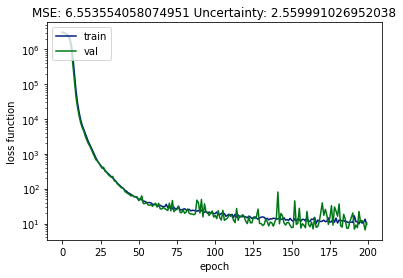

In [16]:
network.plot(ylogscale=True)

In [270]:
r = np.random.randint(len(likes)-1)
# r = np.argmin(likes)
test_sample = samples[r]

new_vector = np.array(test_sample).reshape(1,3)
# new_vector = np.array([0.7,0.5,0.5])
prediction = network.predict(new_vector)


print("Predicción: {}".format(float(prediction)))

Predicción: 17.005767822265625


In [271]:
likes[r], samples[r]

(14.641324009720044, array([0.57358645, 0.02289304, 0.60222709]))

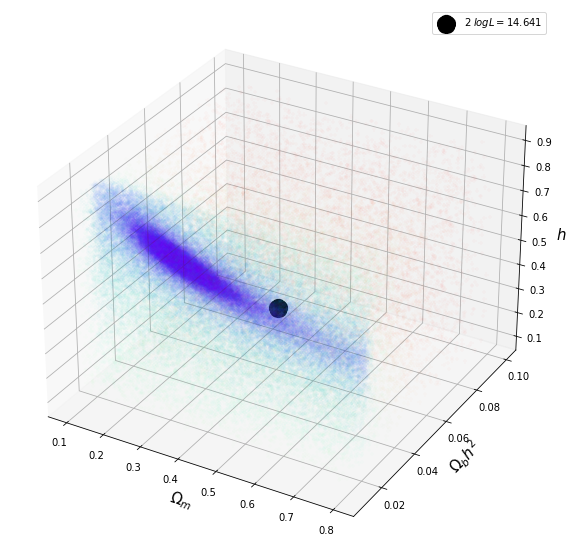

In [272]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(samples[:,0],samples[:,1], samples[:,2], marker='+', c=np.log(likes), cmap='rainbow', alpha=0.02)
ax.set_xlabel('$\Omega_m$', fontsize=15)
ax.set_ylabel('$\Omega_bh^2$', fontsize=15)
ax.set_zlabel('$h$', fontsize=15)
# plt.colorbar(p,shrink=0.5, label='$2\;logL$')
ax.scatter(samples[r][0], samples[r][1], samples[r][2], marker='*', linewidth=15, c='black',\
           alpha=1.0, label='$2\;logL={:.3f}$'.format(likes[r]))
plt.legend()

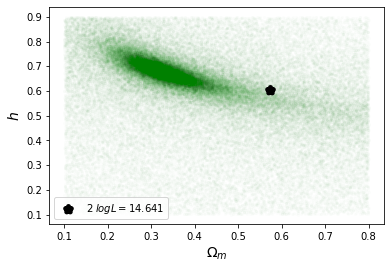

In [273]:
plt.scatter(samples[:,0],samples[:,2], marker='.', linewidth=1e-5, alpha=0.01, c='g')
plt.xlabel('$\Omega_m$', fontsize=14)
plt.ylabel(r'$h$', fontsize=14)
plt.scatter(samples[r][0], samples[r][2],marker='*', linewidth=5, c='black',\
            alpha=1.0, label='$2\;logL={:.3f}$'.format(likes[r]))
plt.legend()

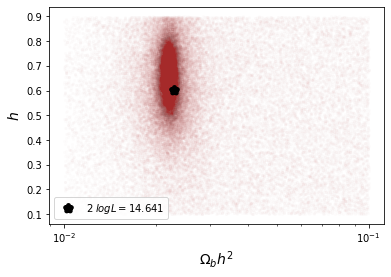

In [274]:
plt.scatter(samples[:,1],samples[:,2], marker='.', linewidth=1e-5, alpha=0.01, c='brown')
plt.xlabel('$\Omega_b h^2$', fontsize=14)
plt.ylabel(r'$h$', fontsize=14)
plt.xscale('log')
plt.scatter(samples[r][1], samples[r][2],marker='*', linewidth=5, c='black',\
            alpha=1.0, label='$2\;logL={:.3f}$'.format(likes[r]))
plt.legend()

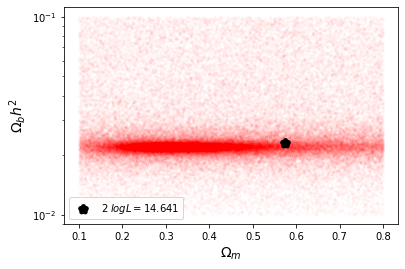

In [275]:
plt.scatter(samples[:,0],samples[:,1], marker='.', linewidth=1e-5, alpha=0.02, c='r')
plt.xlabel('$\Omega_m$', fontsize=14)
plt.ylabel(r'$\Omega_bh^2$', fontsize=14)
plt.yscale('log')
# plt.xscale('log')
plt.scatter(samples[r][0], samples[r][1],marker='*', linewidth=5, c='black',\
            alpha=1.0, label='$2\;logL={:.3f}$'.format(likes[r]))
plt.legend()

In [93]:
predictions = network.predict(samples)

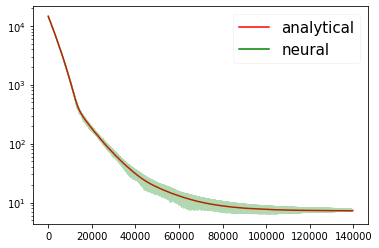

In [239]:

plt.plot(likes, label='analytical', c='red')
plt.plot(predictions, alpha=0.3, label='neural', c='green')
plt.yscale('log')
# plt.xlim(50000,100000)
leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

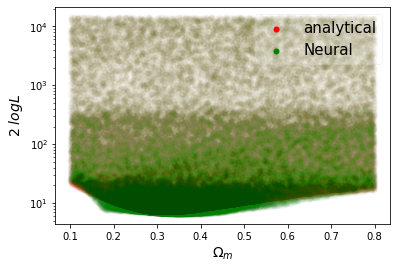

In [232]:
plt.scatter(samples[:,0],likes, linewidth=1e-5, alpha=0.01, c='red', label='analytical')
plt.scatter(samples[:,0],predictions, linewidth=1e-5, alpha=0.02, c='green', label='Neural')

plt.xlabel('$\Omega_m$', fontsize=14)
plt.ylabel(r'$2\;logL$', fontsize=14)
plt.yscale('log')

leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

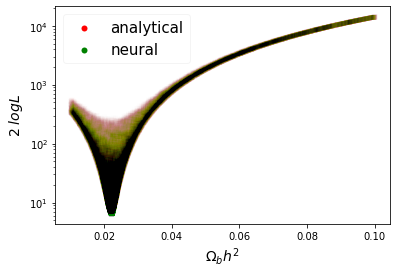

In [240]:
plt.scatter(samples[:,1],likes, linewidth=1e-7, alpha=0.002, marker='o', c='red', label='analytical')
plt.scatter(samples[:,1],predictions, linewidth=1e-7, alpha=0.002, marker='o', c='green', label='neural')
plt.xlabel('$\Omega_bh^2$', fontsize=14)
plt.ylabel(r'$2\;logL$', fontsize=14)
plt.yscale('log')

leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

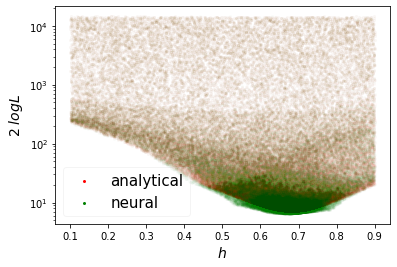

In [235]:
plt.scatter(samples[:,2],likes,marker='.', linewidth=1e-2, alpha=0.02, label='analytical', c='red')
plt.scatter(samples[:,2],predictions,marker='.', linewidth=1e-2, alpha=0.02, c='green', label='neural')
plt.xlabel('$h$', fontsize=14)
plt.ylabel(r'$2\;logL$', fontsize=14)
plt.yscale('log')

leg = plt.legend(fontsize=15, framealpha=0.2)

for lh in leg.legendHandles: 
    lh.set_alpha(1)

In [95]:
# network.save_model('hzlike', path='models')